In [1]:
## Import Library ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## For Data Encoding ##
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

## For Model Evaluation ##
from sklearn.model_selection import KFold

## Machine Learning Model ##
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm, naive_bayes
#pip install  imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel

from sklearn.cluster import KMeans
## For Model Performance ##
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense      # create layers


Using TensorFlow backend.


In [2]:
## Model Performance
def evaluation(gt, pred):
    acc = accuracy_score(gt, pred)
    precision = precision_score(gt, pred)
    recall = recall_score(gt, pred)
    f1 = f1_score(gt, pred)
    matrix = confusion_matrix(gt, pred)
    
    return acc, precision, recall, f1, matrix

In [3]:
raw_data_train0 = pd.read_csv("./fold/fold_0_train.csv", index_col=0)
raw_data_test0 = pd.read_csv("./fold/fold_0_test.csv", index_col=0)
raw_data_train1 = pd.read_csv("./fold/fold_1_train.csv", index_col=0)
raw_data_test1 = pd.read_csv("./fold/fold_1_test.csv", index_col=0)
raw_data_train2 = pd.read_csv("./fold/fold_2_train.csv", index_col=0)
raw_data_test2 = pd.read_csv("./fold/fold_2_test.csv", index_col=0)
raw_data_train3 = pd.read_csv("./fold/fold_3_train.csv", index_col=0)
raw_data_test3 = pd.read_csv("./fold/fold_3_test.csv", index_col=0)
raw_data_train4 = pd.read_csv("./fold/fold_4_train.csv", index_col=0)
raw_data_test4 = pd.read_csv("./fold/fold_4_test.csv", index_col=0)

In [4]:

res0 = pd.concat([raw_data_train0,raw_data_test0],axis=0, ignore_index=True)
res1 = pd.concat([raw_data_train1,raw_data_test1],axis=0, ignore_index=True)
res2 = pd.concat([raw_data_train2,raw_data_test2],axis=0, ignore_index=True)
res3 = pd.concat([raw_data_train3,raw_data_test3],axis=0, ignore_index=True)
res4 = pd.concat([raw_data_train4,raw_data_test4],axis=0, ignore_index=True)
raw_data = res0 
raw_data_forFS = res0 



In [5]:
raw_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
NumCompaniesWorked          1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfacti

In [7]:
categorical_col = []
numeric_col = []
for col in raw_data.columns:
   
    if raw_data[col].dtype == object and col != "Attrition":
        categorical_col.append(col)
        print(col, raw_data[col].unique())
        print("========================================================================")
    elif (raw_data[col].dtype == "int64" or raw_data[col].dtype == "int8") and col != "Attrition":
        
        numeric_col.append(col)

BusinessTravel ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Department ['Research & Development' 'Sales' 'Human Resources']
EducationField ['Medical' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources' 'Other']
Gender ['Male' 'Female']
JobRole ['Research Scientist' 'Sales Executive' 'Laboratory Technician'
 'Manufacturing Director' 'Manager' 'Sales Representative'
 'Healthcare Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Married' 'Single' 'Divorced']


In [8]:
## Encode Label
raw_data["Attrition"] = raw_data["Attrition"].astype("category").cat.codes
raw_data["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [9]:
numeric_col

['Age',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

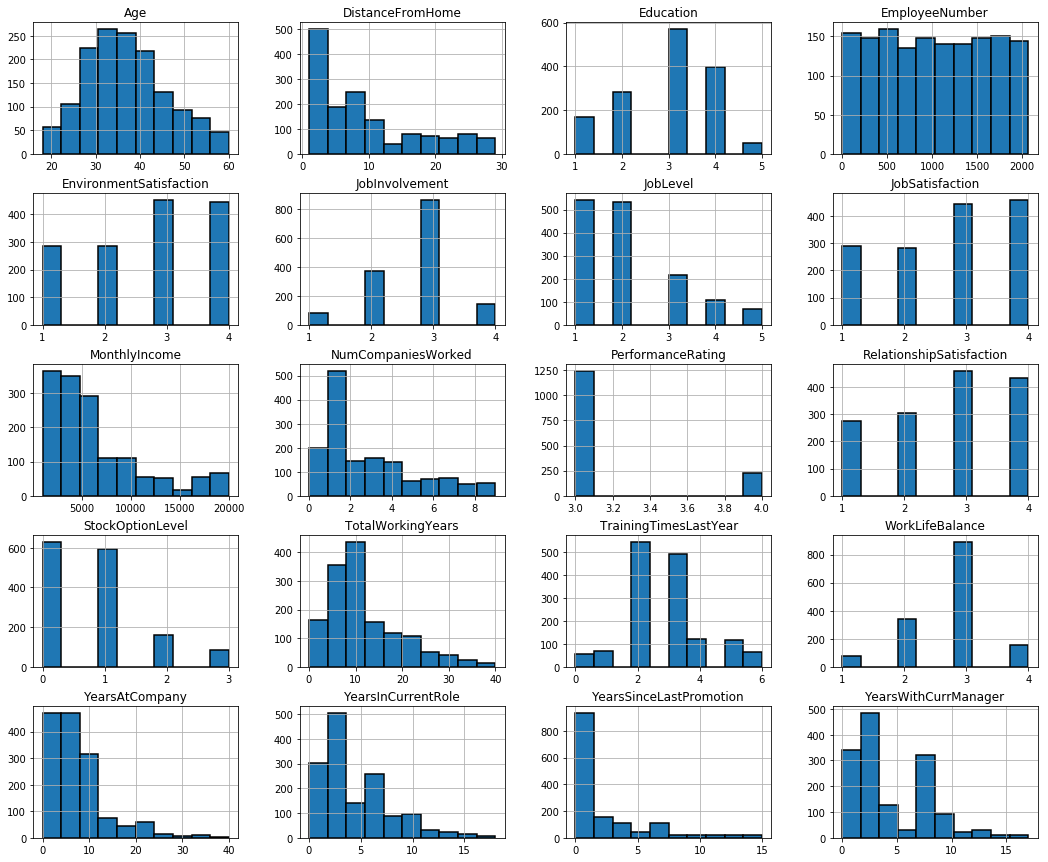

In [10]:
## Data Visualization for numerical data
raw_data[numeric_col].hist(edgecolor='black', linewidth=1.5, figsize=(18, 15))
plt.show()

In [11]:
X = np.array(raw_data["TotalWorkingYears"]).reshape(len(raw_data), 1)
y = np.array(raw_data["MonthlyIncome"])
model = LinearRegression()
model = model.fit(X, y)
pred = model.predict(X)
print("y = %f * X + %f" % (model.coef_[0], model.intercept_))

y = 467.658412 * X + 1227.935288


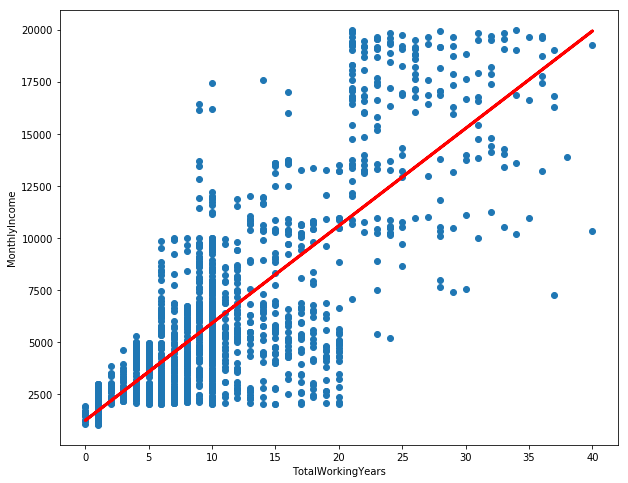

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(raw_data["TotalWorkingYears"], raw_data["MonthlyIncome"])
plt.plot(raw_data["TotalWorkingYears"], pred, color="red", linewidth = 3)
plt.xlabel("TotalWorkingYears")
plt.ylabel("MonthlyIncome")
plt.show()

In [13]:
categorical_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

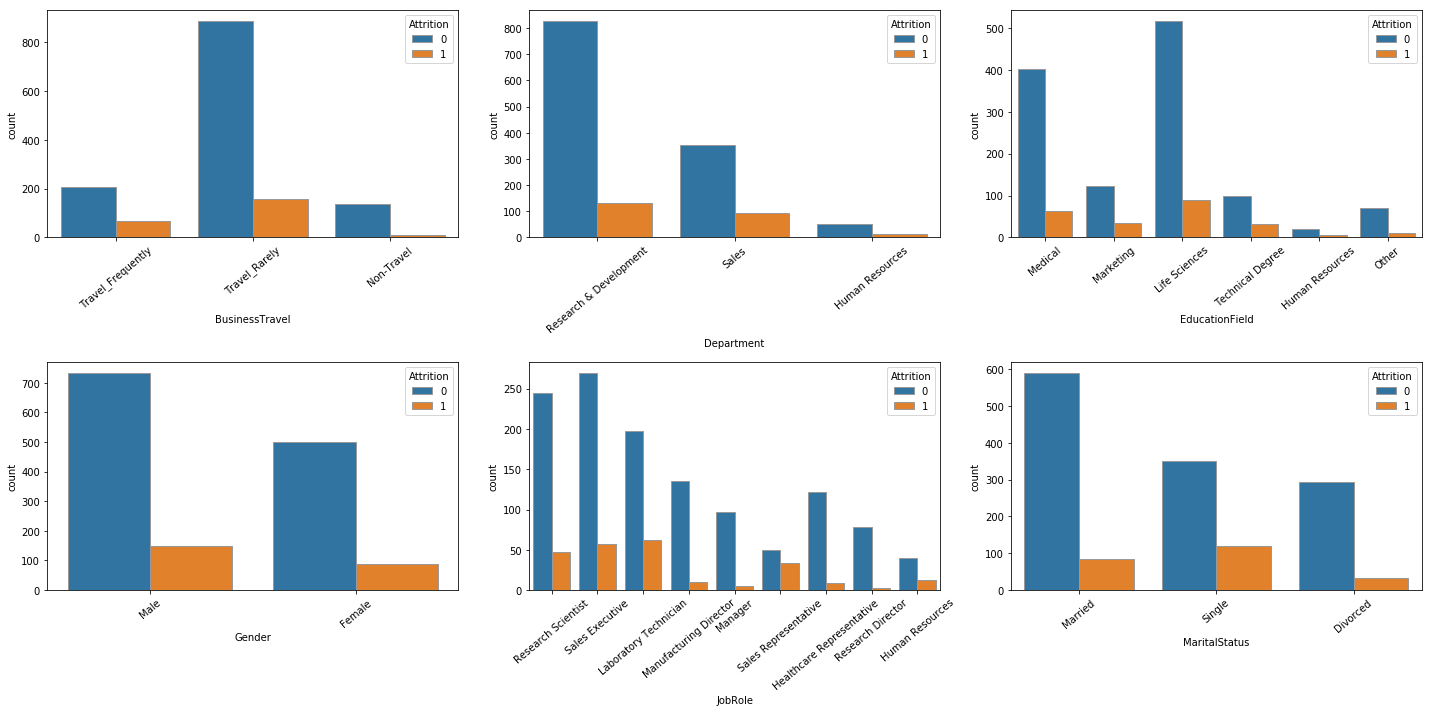

In [14]:
## Data Visualization for categorical data
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for index, col in enumerate(categorical_col):
    row_num = int(index / 3)
    col_num = (index % 3)
    label = list(raw_data[col].unique())
    sns.countplot(x=str(col), hue="Attrition", edgecolor=".6", data=raw_data, ax = axes[row_num, col_num])
    axes[row_num, col_num].set_xticklabels(label, rotation=40)
    
plt.tight_layout()
plt.show()

In [15]:
categorical_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [16]:
## Data Encoding (one-hot encoding)
one_hot_encoding_df = pd.get_dummies(raw_data, columns=categorical_col)

In [17]:
set(one_hot_encoding_df.columns) - set(numeric_col)

{'Attrition',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single'}

In [18]:
one_hot_encoding_df

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,37,0,9,3,403,2,3,1,4,2326,...,0,0,0,0,1,0,0,0,1,0
1,42,0,26,3,404,3,3,4,2,13525,...,0,0,0,0,0,1,0,0,1,0
2,18,1,3,3,405,3,3,1,3,1420,...,1,0,0,0,0,0,0,0,0,1
3,35,0,16,3,406,3,3,3,2,8020,...,0,0,0,0,0,1,0,0,1,0
4,36,0,18,4,407,3,4,1,4,3688,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,28,0,8,2,395,4,3,1,4,3310,...,0,0,0,0,1,0,0,0,0,1
1466,49,0,10,4,396,3,3,5,1,18665,...,0,0,0,1,0,0,0,0,0,1
1467,36,0,3,3,397,3,3,2,2,4485,...,0,0,0,0,1,0,0,0,0,1
1468,31,0,5,3,399,4,3,1,2,2789,...,0,0,0,0,0,0,1,1,0,0


In [19]:
one_hot_encoding_df.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,...,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728
std,9.135373,0.367863,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,...,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
def PreprocessData(datadf,isTrain):
    datadf = pd.get_dummies(datadf, columns=categorical_col) 
    datadf["Attrition"] = datadf["Attrition"].astype("category").cat.codes
    
    mms = preprocessing.MinMaxScaler(feature_range=(0,1))
    datadf[numeric_col] = mms.fit_transform(datadf[numeric_col])
    
    prePData = datadf.loc[:, datadf.columns != 'Attrition']
    Label = datadf.loc[:,"Attrition"]
        
    if (isTrain == 1):
        sm = SMOTE(random_state = 10)
        X_resampled, y_resampled = sm.fit_sample(datadf, datadf["Attrition"] )
        prePData = X_resampled.loc[:, X_resampled.columns != 'Attrition']
        Label = y_resampled
    

    return prePData,Label

In [21]:
clfs = {
        'LogisticRegression':LogisticRegression(solver='liblinear'),
        'decision_tree':DecisionTreeClassifier(random_state=200,criterion='entropy'),
        'naive_gaussian': naive_bayes.GaussianNB(),
        'random_forest' : RandomForestClassifier(n_estimators=300) ,
        'SupportVectorMachines' : svm.SVC() #,
        #'gradient_boost' : GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=1, random_state=0) 
       }



In [22]:
## Data Splitting and Model Learning (Decision Tree)


#處理Label and Attrition 資料
traindataList = [raw_data_train0,raw_data_train1,raw_data_train2,raw_data_train3,raw_data_train4]
testdataList = [raw_data_test0,raw_data_test1,raw_data_test2,raw_data_test3,raw_data_test4]
modelF1 = []

the classifier is : LogisticRegression
Training Data: 1972, Testing Data: 294
Fold: 1, Accuracy: 0.844000, Precision: 0.511000, Recall: 0.511000, F1: 0.511000
Training Data: 1964, Testing Data: 294
Fold: 2, Accuracy: 0.827000, Precision: 0.423000, Recall: 0.512000, F1: 0.463000
Training Data: 1996, Testing Data: 294
Fold: 3, Accuracy: 0.776000, Precision: 0.439000, Recall: 0.424000, F1: 0.431000
Training Data: 1968, Testing Data: 294
Fold: 4, Accuracy: 0.837000, Precision: 0.473000, Recall: 0.578000, F1: 0.520000
Training Data: 1964, Testing Data: 294
Fold: 5, Accuracy: 0.796000, Precision: 0.369000, Recall: 0.558000, F1: 0.444000
Avg Accuracy: 0.816000, Avg Precision: 0.443000, Avg Recall: 0.516000, Avg F1: 0.474000


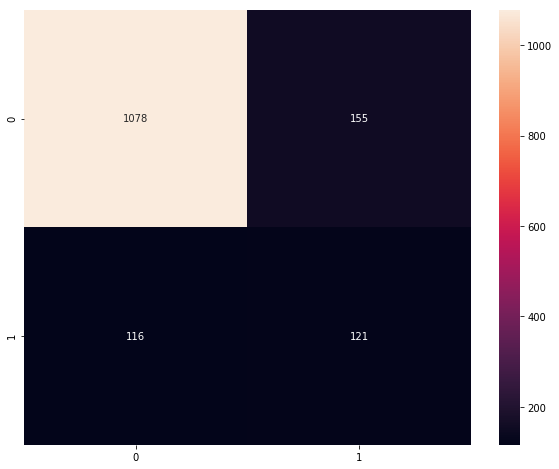

#############################################################################
the classifier is : decision_tree
Training Data: 1972, Testing Data: 294
Fold: 1, Accuracy: 0.697000, Precision: 0.281000, Recall: 0.574000, F1: 0.378000
Training Data: 1964, Testing Data: 294
Fold: 2, Accuracy: 0.793000, Precision: 0.345000, Recall: 0.465000, F1: 0.396000
Training Data: 1996, Testing Data: 294
Fold: 3, Accuracy: 0.714000, Precision: 0.319000, Recall: 0.373000, F1: 0.344000
Training Data: 1968, Testing Data: 294
Fold: 4, Accuracy: 0.704000, Precision: 0.216000, Recall: 0.356000, F1: 0.269000
Training Data: 1964, Testing Data: 294
Fold: 5, Accuracy: 0.748000, Precision: 0.237000, Recall: 0.326000, F1: 0.275000
Avg Accuracy: 0.731000, Avg Precision: 0.280000, Avg Recall: 0.419000, Avg F1: 0.332000


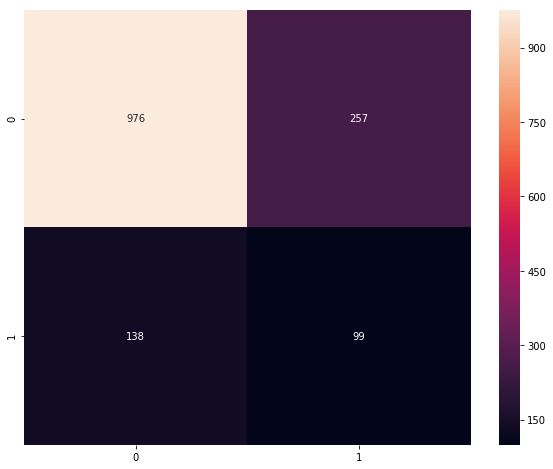

#############################################################################
the classifier is : naive_gaussian
Training Data: 1972, Testing Data: 294
Fold: 1, Accuracy: 0.524000, Precision: 0.225000, Recall: 0.809000, F1: 0.352000
Training Data: 1964, Testing Data: 294
Fold: 2, Accuracy: 0.595000, Precision: 0.243000, Recall: 0.837000, F1: 0.377000
Training Data: 1996, Testing Data: 294
Fold: 3, Accuracy: 0.588000, Precision: 0.265000, Recall: 0.593000, F1: 0.366000
Training Data: 1968, Testing Data: 294
Fold: 4, Accuracy: 0.548000, Precision: 0.207000, Recall: 0.689000, F1: 0.318000
Training Data: 1964, Testing Data: 294
Fold: 5, Accuracy: 0.561000, Precision: 0.213000, Recall: 0.744000, F1: 0.332000
Avg Accuracy: 0.563000, Avg Precision: 0.231000, Avg Recall: 0.734000, Avg F1: 0.349000


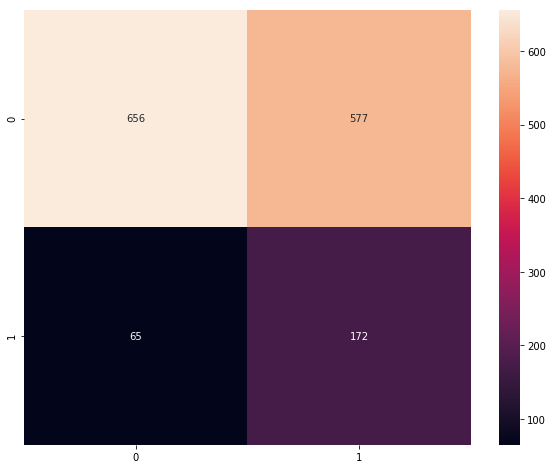

#############################################################################
the classifier is : random_forest
Training Data: 1972, Testing Data: 294
Fold: 1, Accuracy: 0.840000, Precision: 0.500000, Recall: 0.277000, F1: 0.356000
Training Data: 1964, Testing Data: 294
Fold: 2, Accuracy: 0.888000, Precision: 0.778000, Recall: 0.326000, F1: 0.459000
Training Data: 1996, Testing Data: 294
Fold: 3, Accuracy: 0.813000, Precision: 0.591000, Recall: 0.220000, F1: 0.321000
Training Data: 1968, Testing Data: 294
Fold: 4, Accuracy: 0.857000, Precision: 0.565000, Recall: 0.289000, F1: 0.382000
Training Data: 1964, Testing Data: 294
Fold: 5, Accuracy: 0.861000, Precision: 0.538000, Recall: 0.326000, F1: 0.406000
Avg Accuracy: 0.852000, Avg Precision: 0.594000, Avg Recall: 0.287000, Avg F1: 0.385000


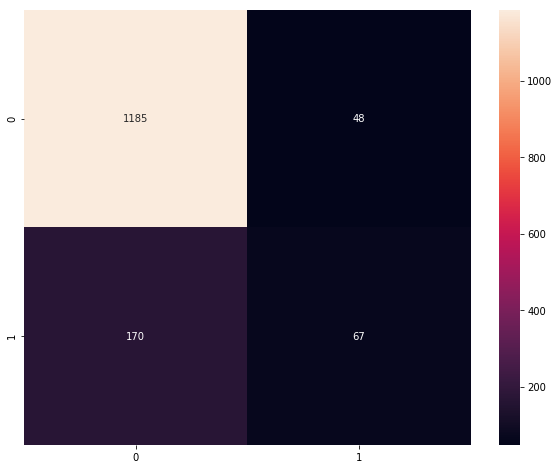

#############################################################################
the classifier is : SupportVectorMachines
Training Data: 1972, Testing Data: 294
Fold: 1, Accuracy: 0.844000, Precision: 0.517000, Recall: 0.319000, F1: 0.395000
Training Data: 1964, Testing Data: 294
Fold: 2, Accuracy: 0.850000, Precision: 0.481000, Recall: 0.302000, F1: 0.371000
Training Data: 1996, Testing Data: 294
Fold: 3, Accuracy: 0.779000, Precision: 0.417000, Recall: 0.254000, F1: 0.316000
Training Data: 1968, Testing Data: 294
Fold: 4, Accuracy: 0.833000, Precision: 0.438000, Recall: 0.311000, F1: 0.364000
Training Data: 1964, Testing Data: 294
Fold: 5, Accuracy: 0.830000, Precision: 0.405000, Recall: 0.349000, F1: 0.375000
Avg Accuracy: 0.827000, Avg Precision: 0.452000, Avg Recall: 0.307000, Avg F1: 0.364000


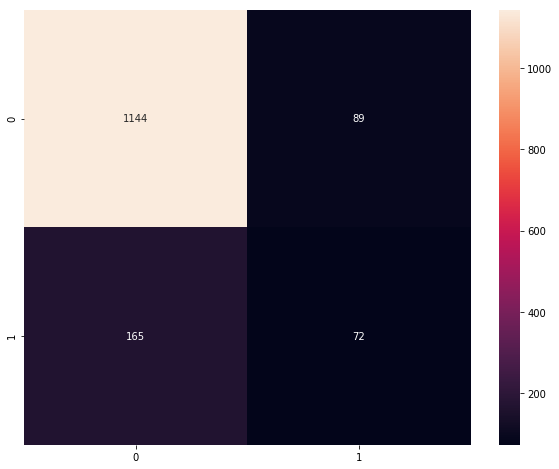

#############################################################################


In [23]:
for clf_key in clfs.keys():
    avg_acc = 0
    avg_precision = 0
    avg_recall = 0
    avg_f1 = 0
    avg_confusion_matrix = []
    avg_feature_importance = []

    kf = KFold(n_splits=5)
    fold_count = 0
    
    print('the classifier is :',clf_key) 
    clf = clfs[clf_key] 
    
    for intI in range(0,5):
        traindataSub = traindataList[intI]
        testdataSub = testdataList[intI]

        train_X , train_y =  PreprocessData(traindataSub,1)
        test_X , test_y =  PreprocessData(testdataSub,0)

        print("Training Data: %d, Testing Data: %d" % (len(train_X), len(testdataSub)))

        #model = DecisionTreeClassifier(random_state=200)
        #model = model.fit(train_X, train_y)

        model = clf.fit(train_X, train_y) 
        test_predict = model.predict(test_X)
        
        #test_predict = model.predict(test_X)
        #avg_feature_importance.append(model.feature_importances_)

        acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)

        print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
        avg_acc += acc
        avg_precision += precision
        avg_recall += recall
        avg_f1 += f1
        avg_confusion_matrix.append(matrix)
        fold_count += 1
        

    print("=================================================================================")
    print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                               round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))
    
    
    modelF1.append([clf_key,round(avg_f1 / kf.get_n_splits(), 3)])
    plt.figure(figsize=(10, 8))
    sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
    plt.show()
    print("#############################################################################")

In [24]:
print(modelF1)

[['LogisticRegression', 0.474], ['decision_tree', 0.332], ['naive_gaussian', 0.349], ['random_forest', 0.385], ['SupportVectorMachines', 0.364]]


Epoch 1/200
1972/1972 [==============================] - 1s 714us/step - loss: 0.6692 - accuracy: 0.5933
Epoch 2/200
1972/1972 [==============================] - 1s 373us/step - loss: 0.5942 - accuracy: 0.73630s - loss: 0
Epoch 3/200
1972/1972 [==============================] - 1s 392us/step - loss: 0.5418 - accuracy: 0.7880
Epoch 4/200
1972/1972 [==============================] - 1s 323us/step - loss: 0.5020 - accuracy: 0.8093
Epoch 5/200
1972/1972 [==============================] - 1s 382us/step - loss: 0.4592 - accuracy: 0.83570s - loss: 0
Epoch 6/200
1972/1972 [==============================] - 1s 371us/step - loss: 0.4224 - accuracy: 0.8555
Epoch 7/200
1972/1972 [==============================] - 1s 425us/step - loss: 0.3409 - accuracy: 0.8747
Epoch 8/200
1972/1972 [==============================] - 1s 394us/step - loss: 0.2921 - accuracy: 0.8895
Epoch 9/200
1972/1972 [==============================] - 1s 377us/step - loss: 0.2613 - accuracy: 0.9001
Epoch 10/200
1972/1972 [=======

1972/1972 [==============================] - 0s 164us/step - loss: 0.0295 - accuracy: 0.9863
Epoch 79/200
1972/1972 [==============================] - 0s 171us/step - loss: 0.0124 - accuracy: 0.9965
Epoch 80/200
1972/1972 [==============================] - 0s 157us/step - loss: 0.0078 - accuracy: 0.9980
Epoch 81/200
1972/1972 [==============================] - 0s 158us/step - loss: 0.0075 - accuracy: 0.9980
Epoch 82/200
1972/1972 [==============================] - 0s 153us/step - loss: 0.0068 - accuracy: 0.9980
Epoch 83/200
1972/1972 [==============================] - 0s 155us/step - loss: 0.0057 - accuracy: 0.9980
Epoch 84/200
1972/1972 [==============================] - 0s 157us/step - loss: 0.0047 - accuracy: 0.9985
Epoch 85/200
1972/1972 [==============================] - 0s 153us/step - loss: 0.0044 - accuracy: 0.9985
Epoch 86/200
1972/1972 [==============================] - 0s 155us/step - loss: 0.0041 - accuracy: 0.9985
Epoch 87/200
1972/1972 [==============================] - 0

1972/1972 [==============================] - 0s 168us/step - loss: 4.0540e-05 - accuracy: 1.0000
Epoch 154/200
1972/1972 [==============================] - 0s 175us/step - loss: 4.5343e-05 - accuracy: 1.0000
Epoch 155/200
1972/1972 [==============================] - 0s 174us/step - loss: 3.3604e-05 - accuracy: 1.0000
Epoch 156/200
1972/1972 [==============================] - 0s 166us/step - loss: 3.1433e-05 - accuracy: 1.0000
Epoch 157/200
1972/1972 [==============================] - 0s 159us/step - loss: 3.0055e-05 - accuracy: 1.0000
Epoch 158/200
1972/1972 [==============================] - 0s 163us/step - loss: 3.0178e-05 - accuracy: 1.0000
Epoch 159/200
1972/1972 [==============================] - 0s 165us/step - loss: 2.5850e-05 - accuracy: 1.0000
Epoch 160/200
1972/1972 [==============================] - 0s 166us/step - loss: 2.4894e-05 - accuracy: 1.0000
Epoch 161/200
1972/1972 [==============================] - 0s 156us/step - loss: 2.3077e-05 - accuracy: 1.0000
Epoch 162/200
1

1964/1964 [==============================] - 0s 160us/step - loss: 0.0069 - accuracy: 0.9990
Epoch 28/200
1964/1964 [==============================] - 0s 162us/step - loss: 0.0040 - accuracy: 0.9995
Epoch 29/200
1964/1964 [==============================] - 0s 156us/step - loss: 0.0030 - accuracy: 0.9995
Epoch 30/200
1964/1964 [==============================] - 0s 147us/step - loss: 0.0026 - accuracy: 0.9995
Epoch 31/200
1964/1964 [==============================] - 0s 147us/step - loss: 0.0025 - accuracy: 0.9995
Epoch 32/200
1964/1964 [==============================] - 0s 163us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 33/200
1964/1964 [==============================] - 0s 156us/step - loss: 0.0019 - accuracy: 0.9995
Epoch 34/200
1964/1964 [==============================] - 0s 148us/step - loss: 0.0018 - accuracy: 0.9995
Epoch 35/200
1964/1964 [==============================] - 0s 146us/step - loss: 0.0017 - accuracy: 0.9995
Epoch 36/200
1964/1964 [==============================] - 0

1964/1964 [==============================] - 0s 121us/step - loss: 2.8398e-05 - accuracy: 1.0000
Epoch 102/200
1964/1964 [==============================] - 0s 118us/step - loss: 2.5744e-05 - accuracy: 1.0000
Epoch 103/200
1964/1964 [==============================] - 0s 118us/step - loss: 2.2828e-05 - accuracy: 1.0000
Epoch 104/200
1964/1964 [==============================] - 0s 121us/step - loss: 2.2131e-05 - accuracy: 1.0000
Epoch 105/200
1964/1964 [==============================] - 0s 122us/step - loss: 2.0666e-05 - accuracy: 1.0000
Epoch 106/200
1964/1964 [==============================] - 0s 122us/step - loss: 1.8992e-05 - accuracy: 1.0000
Epoch 107/200
1964/1964 [==============================] - 0s 128us/step - loss: 1.8009e-05 - accuracy: 1.0000
Epoch 108/200
1964/1964 [==============================] - 0s 117us/step - loss: 1.6349e-05 - accuracy: 1.0000
Epoch 109/200
1964/1964 [==============================] - 0s 121us/step - loss: 1.6096e-05 - accuracy: 1.0000
Epoch 110/200
1

1964/1964 [==============================] - 0s 177us/step - loss: 1.8061e-07 - accuracy: 1.0000
Epoch 175/200
1964/1964 [==============================] - 0s 182us/step - loss: 1.6891e-07 - accuracy: 1.0000
Epoch 176/200
1964/1964 [==============================] - 0s 169us/step - loss: 1.8947e-07 - accuracy: 1.0000
Epoch 177/200
1964/1964 [==============================] - 0s 153us/step - loss: 1.5060e-07 - accuracy: 1.0000
Epoch 178/200
1964/1964 [==============================] - 0s 164us/step - loss: 1.4039e-07 - accuracy: 1.0000
Epoch 179/200
1964/1964 [==============================] - 0s 155us/step - loss: 1.3264e-07 - accuracy: 1.0000
Epoch 180/200
1964/1964 [==============================] - 0s 127us/step - loss: 1.2664e-07 - accuracy: 1.0000
Epoch 181/200
1964/1964 [==============================] - 0s 142us/step - loss: 1.1426e-07 - accuracy: 1.0000
Epoch 182/200
1964/1964 [==============================] - 0s 145us/step - loss: 1.0486e-07 - accuracy: 1.0000
Epoch 183/200
1

1996/1996 [==============================] - 0s 118us/step - loss: 3.1234e-05 - accuracy: 1.0000
Epoch 49/200
1996/1996 [==============================] - 0s 132us/step - loss: 2.9164e-05 - accuracy: 1.0000
Epoch 50/200
1996/1996 [==============================] - 0s 171us/step - loss: 2.7424e-05 - accuracy: 1.0000
Epoch 51/200
1996/1996 [==============================] - 0s 137us/step - loss: 2.5971e-05 - accuracy: 1.0000
Epoch 52/200
1996/1996 [==============================] - 0s 115us/step - loss: 2.4391e-05 - accuracy: 1.0000
Epoch 53/200
1996/1996 [==============================] - 0s 118us/step - loss: 2.3020e-05 - accuracy: 1.0000
Epoch 54/200
1996/1996 [==============================] - 0s 120us/step - loss: 2.1742e-05 - accuracy: 1.0000
Epoch 55/200
1996/1996 [==============================] - 0s 123us/step - loss: 2.0730e-05 - accuracy: 1.0000
Epoch 56/200
1996/1996 [==============================] - 0s 156us/step - loss: 1.9320e-05 - accuracy: 1.0000
Epoch 57/200
1996/1996 

1996/1996 [==============================] - 0s 146us/step - loss: 2.9114e-07 - accuracy: 1.0000
Epoch 123/200
1996/1996 [==============================] - 0s 145us/step - loss: 2.7744e-07 - accuracy: 1.0000
Epoch 124/200
1996/1996 [==============================] - 0s 123us/step - loss: 2.5474e-07 - accuracy: 1.0000
Epoch 125/200
1996/1996 [==============================] - 0s 119us/step - loss: 2.4012e-07 - accuracy: 1.0000
Epoch 126/200
1996/1996 [==============================] - 0s 120us/step - loss: 2.2375e-07 - accuracy: 1.0000
Epoch 127/200
1996/1996 [==============================] - 0s 124us/step - loss: 2.1369e-07 - accuracy: 1.0000
Epoch 128/200
1996/1996 [==============================] - 0s 138us/step - loss: 1.9962e-07 - accuracy: 1.0000
Epoch 129/200
1996/1996 [==============================] - 0s 138us/step - loss: 1.8463e-07 - accuracy: 1.0000
Epoch 130/200
1996/1996 [==============================] - 0s 123us/step - loss: 1.7312e-07 - accuracy: 1.0000
Epoch 131/200
1

1996/1996 [==============================] - 0s 125us/step - loss: 3.5410e-09 - accuracy: 1.0000
Epoch 196/200
1996/1996 [==============================] - 0s 120us/step - loss: 3.3160e-09 - accuracy: 1.0000
Epoch 197/200
1996/1996 [==============================] - 0s 120us/step - loss: 3.2219e-09 - accuracy: 1.0000
Epoch 198/200
1996/1996 [==============================] - 0s 124us/step - loss: 3.0198e-09 - accuracy: 1.0000
Epoch 199/200
1996/1996 [==============================] - 0s 127us/step - loss: 2.9372e-09 - accuracy: 1.0000
Epoch 200/200
1996/1996 [==============================] - 1s 505us/step - loss: 2.7785e-09 - accuracy: 1.0000
Fold: 3, Accuracy: 0.949000, Precision: 0.940000, Recall: 0.797000, F1: 0.862000
Epoch 1/200
1968/1968 [==============================] - 1s 427us/step - loss: 0.6175 - accuracy: 0.9309
Epoch 2/200
1968/1968 [==============================] - 1s 444us/step - loss: 0.0424 - accuracy: 0.9853
Epoch 3/200
1968/1968 [==============================] - 

1968/1968 [==============================] - 0s 152us/step - loss: 5.9744e-06 - accuracy: 1.0000
Epoch 69/200
1968/1968 [==============================] - 0s 156us/step - loss: 5.6166e-06 - accuracy: 1.0000
Epoch 70/200
1968/1968 [==============================] - 0s 151us/step - loss: 5.3523e-06 - accuracy: 1.0000
Epoch 71/200
1968/1968 [==============================] - 0s 168us/step - loss: 5.0229e-06 - accuracy: 1.0000
Epoch 72/200
1968/1968 [==============================] - 0s 150us/step - loss: 4.8099e-06 - accuracy: 1.0000
Epoch 73/200
1968/1968 [==============================] - 0s 157us/step - loss: 4.5005e-06 - accuracy: 1.0000
Epoch 74/200
1968/1968 [==============================] - 0s 146us/step - loss: 4.2561e-06 - accuracy: 1.0000
Epoch 75/200
1968/1968 [==============================] - 0s 151us/step - loss: 4.0053e-06 - accuracy: 1.0000
Epoch 76/200
1968/1968 [==============================] - 0s 152us/step - loss: 3.8116e-06 - accuracy: 1.0000
Epoch 77/200
1968/1968 

1968/1968 [==============================] - 0s 146us/step - loss: 8.3076e-08 - accuracy: 1.0000
Epoch 143/200
1968/1968 [==============================] - 0s 145us/step - loss: 8.0484e-08 - accuracy: 1.0000
Epoch 144/200
1968/1968 [==============================] - 0s 145us/step - loss: 7.1843e-08 - accuracy: 1.0000
Epoch 145/200
1968/1968 [==============================] - 0s 149us/step - loss: 6.8253e-08 - accuracy: 1.0000
Epoch 146/200
1968/1968 [==============================] - 0s 145us/step - loss: 6.3751e-08 - accuracy: 1.0000
Epoch 147/200
1968/1968 [==============================] - 0s 151us/step - loss: 5.9956e-08 - accuracy: 1.0000
Epoch 148/200
1968/1968 [==============================] - 0s 148us/step - loss: 5.5782e-08 - accuracy: 1.0000
Epoch 149/200
1968/1968 [==============================] - 0s 142us/step - loss: 5.3194e-08 - accuracy: 1.0000
Epoch 150/200
1968/1968 [==============================] - 0s 145us/step - loss: 5.0119e-08 - accuracy: 1.0000
Epoch 151/200
1

1964/1964 [==============================] - 0s 132us/step - loss: 2.5484e-04 - accuracy: 1.0000
Epoch 16/200
1964/1964 [==============================] - 0s 132us/step - loss: 2.3061e-04 - accuracy: 1.0000
Epoch 17/200
1964/1964 [==============================] - 0s 133us/step - loss: 2.0766e-04 - accuracy: 1.0000
Epoch 18/200
1964/1964 [==============================] - 0s 139us/step - loss: 1.8964e-04 - accuracy: 1.0000
Epoch 19/200
1964/1964 [==============================] - 0s 129us/step - loss: 1.7197e-04 - accuracy: 1.0000
Epoch 20/200
1964/1964 [==============================] - 0s 115us/step - loss: 1.5590e-04 - accuracy: 1.0000
Epoch 21/200
1964/1964 [==============================] - 0s 121us/step - loss: 1.4301e-04 - accuracy: 1.0000
Epoch 22/200
1964/1964 [==============================] - 0s 123us/step - loss: 1.3041e-04 - accuracy: 1.0000
Epoch 23/200
1964/1964 [==============================] - 0s 120us/step - loss: 1.1948e-04 - accuracy: 1.0000
Epoch 24/200
1964/1964 

1964/1964 [==============================] - 0s 126us/step - loss: 1.3359e-06 - accuracy: 1.0000
Epoch 90/200
1964/1964 [==============================] - 0s 119us/step - loss: 1.2617e-06 - accuracy: 1.0000
Epoch 91/200
1964/1964 [==============================] - 0s 126us/step - loss: 1.1905e-06 - accuracy: 1.0000
Epoch 92/200
1964/1964 [==============================] - 0s 121us/step - loss: 1.1181e-06 - accuracy: 1.0000
Epoch 93/200
1964/1964 [==============================] - 0s 121us/step - loss: 1.0466e-06 - accuracy: 1.0000
Epoch 94/200
1964/1964 [==============================] - 0s 121us/step - loss: 9.9092e-07 - accuracy: 1.0000
Epoch 95/200
1964/1964 [==============================] - 0s 116us/step - loss: 9.3444e-07 - accuracy: 1.0000
Epoch 96/200
1964/1964 [==============================] - 0s 120us/step - loss: 8.7877e-07 - accuracy: 1.0000
Epoch 97/200
1964/1964 [==============================] - 0s 151us/step - loss: 8.3211e-07 - accuracy: 1.0000
Epoch 98/200
1964/1964 

1964/1964 [==============================] - 0s 120us/step - loss: 1.6827e-08 - accuracy: 1.0000
Epoch 164/200
1964/1964 [==============================] - 0s 121us/step - loss: 1.5008e-08 - accuracy: 1.0000
Epoch 165/200
1964/1964 [==============================] - 0s 118us/step - loss: 1.4068e-08 - accuracy: 1.0000
Epoch 166/200
1964/1964 [==============================] - 0s 118us/step - loss: 1.3883e-08 - accuracy: 1.0000
Epoch 167/200
1964/1964 [==============================] - 0s 121us/step - loss: 1.2771e-08 - accuracy: 1.0000
Epoch 168/200
1964/1964 [==============================] - 0s 120us/step - loss: 1.1945e-08 - accuracy: 1.0000
Epoch 169/200
1964/1964 [==============================] - 0s 120us/step - loss: 1.1473e-08 - accuracy: 1.0000
Epoch 170/200
1964/1964 [==============================] - 0s 119us/step - loss: 1.0828e-08 - accuracy: 1.0000
Epoch 171/200
1964/1964 [==============================] - 0s 119us/step - loss: 1.0362e-08 - accuracy: 1.0000
Epoch 172/200
1

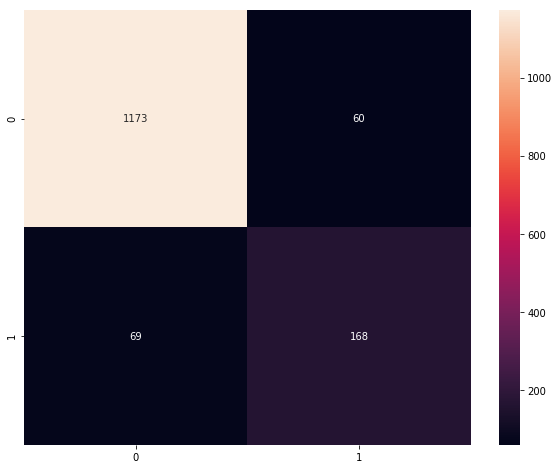

In [25]:
#NN
model = Sequential()

# layers
model.add(Dense(units = 50, activation = 'relu', input_dim = 46))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_confusion_matrix = []
avg_feature_importance = []

kf = KFold(n_splits=5)
fold_count = 0

for intI in range(0,5):
    traindataSub = traindataList[intI]
    testdataSub = testdataList[intI]
        
    train_X , train_y =  PreprocessData(traindataSub,1)
    test_X , test_y =  PreprocessData(testdataSub,0)
        
    # Train the ANN
    model.fit(train_X, train_y, batch_size = 16, epochs = 200)
    y_pred = model.predict(test_X)
    test_predict = (y_pred > 0.5).astype(int).reshape(test_X.shape[0])
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
        
        

    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1
      
  
print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                               round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))
    
    

plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()


# 篩選Feature 

In [26]:
categorical_colFS = ['BusinessTravel',
 'Department',
 'Gender',
 'JobRole',
 ]

def PreprocessDataFS(datadf,isTrain):
    
    two_mode_data1 = np.array(datadf[["TotalWorkingYears", "MonthlyIncome"]])
    kmeans_model = KMeans(n_clusters=5, random_state=100).fit(two_mode_data1)
    datadf['WorkingYearsWIncome'] = kmeans_model.labels_

    
    AgeClass = np.array(datadf[["Age"]])
    kmeans_model = KMeans(n_clusters=6, random_state=100).fit(AgeClass)
    datadf['AgeClass'] = kmeans_model.labels_


    DistanceClass = np.array(datadf[["DistanceFromHome"]])
    kmeans_model = KMeans(n_clusters=10, random_state=100).fit(DistanceClass)
    datadf['DistanceFromHomeClass'] = kmeans_model.labels_

    EmployeeNOClass = np.array(datadf[["EmployeeNumber"]])
    kmeans_model = KMeans(n_clusters=10, random_state=100).fit(EmployeeNOClass)
    datadf['EmployeeNOClass'] = kmeans_model.labels_

    YearsAtCompanyClass = np.array(datadf[["YearsAtCompany"]])
    kmeans_model = KMeans(n_clusters=10, random_state=100).fit(YearsAtCompanyClass)
    datadf['YearsAtCompanyClass'] = kmeans_model.labels_


    datadf= datadf.drop(['WorkLifeBalance','Education','EducationField','MonthlyIncome','TotalWorkingYears',
                         'MaritalStatus','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','Age',
                        'DistanceFromHome','EmployeeNumber','YearsAtCompany'],axis=1)
    
    datadf = pd.get_dummies(datadf, columns=categorical_colFS) 
    datadf["Attrition"] = datadf["Attrition"].astype("category").cat.codes
    
     
    prePData = datadf.loc[:, datadf.columns != 'Attrition']
    Label = datadf.loc[:,"Attrition"]
        
    if (isTrain == 1):
        sm = SMOTE(random_state = 10)
        X_resampled, y_resampled = sm.fit_sample(datadf, datadf["Attrition"] )
        prePData = X_resampled.loc[:, X_resampled.columns != 'Attrition']
        Label = y_resampled
    
   
    return prePData,Label

the classifier is : LogisticRegression
Training Data: 1972, Testing Data: 294
Fold: 1, Accuracy: 0.844000, Precision: 0.524000, Recall: 0.234000, F1: 0.324000
Training Data: 1964, Testing Data: 294
Fold: 2, Accuracy: 0.827000, Precision: 0.346000, Recall: 0.209000, F1: 0.261000
Training Data: 1996, Testing Data: 294
Fold: 3, Accuracy: 0.803000, Precision: 0.520000, Recall: 0.220000, F1: 0.310000
Training Data: 1968, Testing Data: 294
Fold: 4, Accuracy: 0.857000, Precision: 0.535000, Recall: 0.511000, F1: 0.523000
Training Data: 1964, Testing Data: 294
Fold: 5, Accuracy: 0.871000, Precision: 0.619000, Recall: 0.302000, F1: 0.406000
Avg Accuracy: 0.840000, Avg Precision: 0.509000, Avg Recall: 0.295000, Avg F1: 0.365000


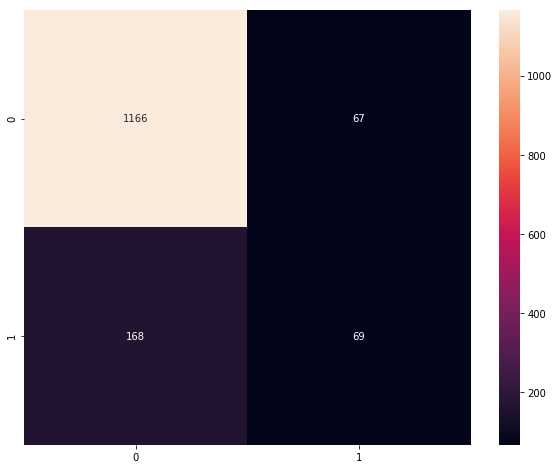

#############################################################################
the classifier is : decision_tree
Training Data: 1972, Testing Data: 294
Fold: 1, Accuracy: 0.731000, Precision: 0.242000, Recall: 0.319000, F1: 0.275000
Training Data: 1964, Testing Data: 294
Fold: 2, Accuracy: 0.711000, Precision: 0.191000, Recall: 0.302000, F1: 0.234000
Training Data: 1996, Testing Data: 294
Fold: 3, Accuracy: 0.745000, Precision: 0.318000, Recall: 0.237000, F1: 0.272000
Training Data: 1968, Testing Data: 294
Fold: 4, Accuracy: 0.745000, Precision: 0.273000, Recall: 0.400000, F1: 0.324000
Training Data: 1964, Testing Data: 294
Fold: 5, Accuracy: 0.776000, Precision: 0.317000, Recall: 0.465000, F1: 0.377000
Avg Accuracy: 0.741000, Avg Precision: 0.268000, Avg Recall: 0.345000, Avg F1: 0.297000


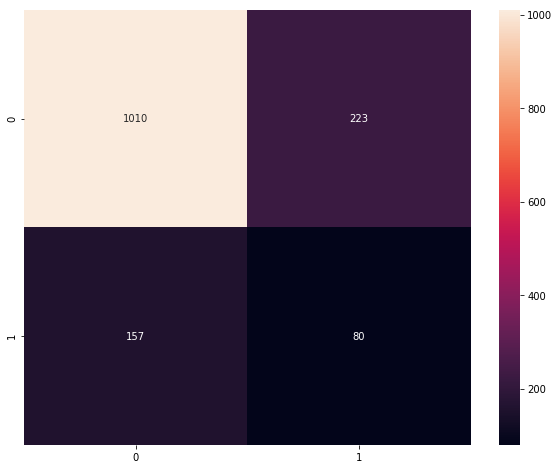

#############################################################################
the classifier is : naive_gaussian
Training Data: 1972, Testing Data: 294
Fold: 1, Accuracy: 0.503000, Precision: 0.217000, Recall: 0.809000, F1: 0.342000
Training Data: 1964, Testing Data: 294
Fold: 2, Accuracy: 0.561000, Precision: 0.224000, Recall: 0.814000, F1: 0.352000
Training Data: 1996, Testing Data: 294
Fold: 3, Accuracy: 0.605000, Precision: 0.286000, Recall: 0.644000, F1: 0.396000
Training Data: 1968, Testing Data: 294
Fold: 4, Accuracy: 0.548000, Precision: 0.218000, Recall: 0.756000, F1: 0.338000
Training Data: 1964, Testing Data: 294
Fold: 5, Accuracy: 0.554000, Precision: 0.203000, Recall: 0.698000, F1: 0.314000
Avg Accuracy: 0.554000, Avg Precision: 0.230000, Avg Recall: 0.744000, Avg F1: 0.348000


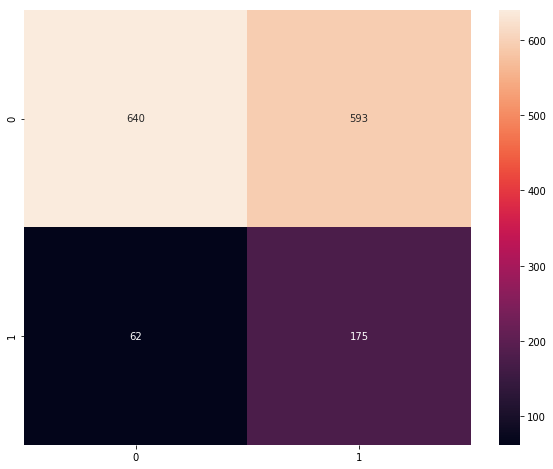

#############################################################################
the classifier is : random_forest
Training Data: 1972, Testing Data: 294
Fold: 1, Accuracy: 0.833000, Precision: 0.450000, Recall: 0.191000, F1: 0.269000
Training Data: 1964, Testing Data: 294
Fold: 2, Accuracy: 0.833000, Precision: 0.385000, Recall: 0.233000, F1: 0.290000
Training Data: 1996, Testing Data: 294
Fold: 3, Accuracy: 0.779000, Precision: 0.350000, Recall: 0.119000, F1: 0.177000
Training Data: 1968, Testing Data: 294
Fold: 4, Accuracy: 0.864000, Precision: 0.619000, Recall: 0.289000, F1: 0.394000
Training Data: 1964, Testing Data: 294
Fold: 5, Accuracy: 0.827000, Precision: 0.357000, Recall: 0.233000, F1: 0.282000
Avg Accuracy: 0.827000, Avg Precision: 0.432000, Avg Recall: 0.213000, Avg F1: 0.282000


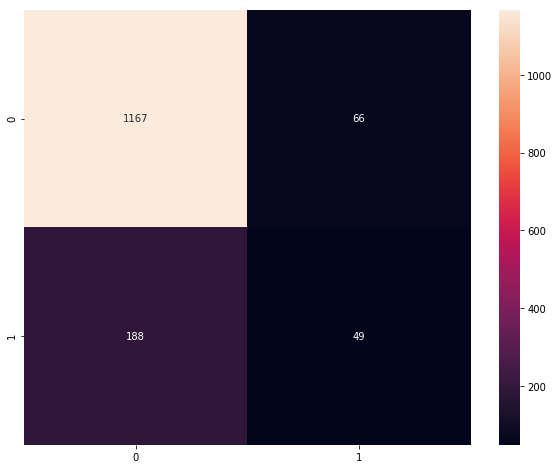

#############################################################################
the classifier is : SupportVectorMachines
Training Data: 1972, Testing Data: 294
Fold: 1, Accuracy: 0.813000, Precision: 0.333000, Recall: 0.170000, F1: 0.225000
Training Data: 1964, Testing Data: 294
Fold: 2, Accuracy: 0.803000, Precision: 0.358000, Recall: 0.442000, F1: 0.396000
Training Data: 1996, Testing Data: 294
Fold: 3, Accuracy: 0.776000, Precision: 0.405000, Recall: 0.254000, F1: 0.312000
Training Data: 1968, Testing Data: 294
Fold: 4, Accuracy: 0.840000, Precision: 0.480000, Recall: 0.533000, F1: 0.505000
Training Data: 1964, Testing Data: 294
Fold: 5, Accuracy: 0.830000, Precision: 0.394000, Recall: 0.302000, F1: 0.342000
Avg Accuracy: 0.812000, Avg Precision: 0.394000, Avg Recall: 0.340000, Avg F1: 0.356000


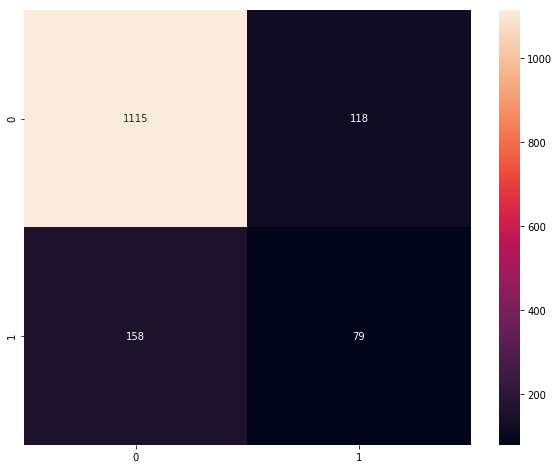

#############################################################################


In [27]:
for clf_key in clfs.keys():
    avg_acc = 0
    avg_precision = 0
    avg_recall = 0
    avg_f1 = 0
    avg_confusion_matrix = []
    avg_feature_importance = []

    kf = KFold(n_splits=5)
    fold_count = 0
    
    print('the classifier is :',clf_key) 
    clf = clfs[clf_key] 
    
    for intI in range(0,5):
        traindataSub = traindataList[intI]
        testdataSub = testdataList[intI]

        train_X , train_y =  PreprocessDataFS(traindataSub,1)
        test_X , test_y =  PreprocessDataFS(testdataSub,0)

        print("Training Data: %d, Testing Data: %d" % (len(train_X), len(testdataSub)))
        
        #model = DecisionTreeClassifier(random_state=200)
        #model = model.fit(train_X, train_y)
        
        model = clf.fit(train_X, train_y) 
        test_predict = model.predict(test_X)
        
        #test_predict = model.predict(test_X)
        #avg_feature_importance.append(model.feature_importances_)

        acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)

        print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
        avg_acc += acc
        avg_precision += precision
        avg_recall += recall
        avg_f1 += f1
        avg_confusion_matrix.append(matrix)
        fold_count += 1
        
        
    
    print("=================================================================================")
    print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                               round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))
    
    
    modelF1.append([clf_key,round(avg_f1 / kf.get_n_splits(), 3)])
    plt.figure(figsize=(10, 8))
    sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
    plt.show()
    print("#############################################################################")
    

Epoch 1/200
1972/1972 [==============================] - 1s 715us/step - loss: 0.6211 - accuracy: 0.6557
Epoch 2/200
1972/1972 [==============================] - 1s 389us/step - loss: 0.5172 - accuracy: 0.7373
Epoch 3/200
1972/1972 [==============================] - 1s 369us/step - loss: 0.4464 - accuracy: 0.7901
Epoch 4/200
1972/1972 [==============================] - 1s 363us/step - loss: 0.3939 - accuracy: 0.8245
Epoch 5/200
1972/1972 [==============================] - 1s 372us/step - loss: 0.3331 - accuracy: 0.8575
Epoch 6/200
1972/1972 [==============================] - 1s 583us/step - loss: 0.2902 - accuracy: 0.88740s - los
Epoch 7/200
1972/1972 [==============================] - 1s 687us/step - loss: 0.2559 - accuracy: 0.89910s - l
Epoch 8/200
1972/1972 [==============================] - 1s 453us/step - loss: 0.2300 - accuracy: 0.9118
Epoch 9/200
1972/1972 [==============================] - 1s 379us/step - loss: 0.2142 - accuracy: 0.9184
Epoch 10/200
1972/1972 [=================

1972/1972 [==============================] - 0s 157us/step - loss: 0.0191 - accuracy: 0.9954
Epoch 79/200
1972/1972 [==============================] - 0s 156us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 80/200
1972/1972 [==============================] - 0s 140us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 81/200
1972/1972 [==============================] - 0s 152us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 82/200
1972/1972 [==============================] - 0s 168us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 83/200
1972/1972 [==============================] - 0s 157us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 84/200
1972/1972 [==============================] - 0s 160us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 85/200
1972/1972 [==============================] - 0s 163us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 86/200
1972/1972 [==============================] - 0s 157us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 87/200
1972/1972 [==============================] - 0

1972/1972 [==============================] - 0s 124us/step - loss: 3.5075e-04 - accuracy: 1.0000
Epoch 154/200
1972/1972 [==============================] - 0s 125us/step - loss: 3.1988e-04 - accuracy: 1.0000
Epoch 155/200
1972/1972 [==============================] - 0s 155us/step - loss: 3.0160e-04 - accuracy: 1.0000
Epoch 156/200
1972/1972 [==============================] - 0s 140us/step - loss: 2.6751e-04 - accuracy: 1.0000
Epoch 157/200
1972/1972 [==============================] - 0s 148us/step - loss: 2.6492e-04 - accuracy: 1.0000
Epoch 158/200
1972/1972 [==============================] - 0s 138us/step - loss: 2.5469e-04 - accuracy: 1.0000
Epoch 159/200
1972/1972 [==============================] - 0s 129us/step - loss: 2.6484e-04 - accuracy: 1.0000
Epoch 160/200
1972/1972 [==============================] - 0s 124us/step - loss: 2.2195e-04 - accuracy: 1.0000
Epoch 161/200
1972/1972 [==============================] - 0s 120us/step - loss: 2.1515e-04 - accuracy: 1.0000
Epoch 162/200
1

1964/1964 [==============================] - 0s 164us/step - loss: 0.0616 - accuracy: 0.9796
Epoch 28/200
1964/1964 [==============================] - 0s 130us/step - loss: 0.0489 - accuracy: 0.9852
Epoch 29/200
1964/1964 [==============================] - 0s 134us/step - loss: 0.0546 - accuracy: 0.9812
Epoch 30/200
1964/1964 [==============================] - 0s 126us/step - loss: 0.0410 - accuracy: 0.9883
Epoch 31/200
1964/1964 [==============================] - 0s 157us/step - loss: 0.0443 - accuracy: 0.9832
Epoch 32/200
1964/1964 [==============================] - 0s 136us/step - loss: 0.0549 - accuracy: 0.9812
Epoch 33/200
1964/1964 [==============================] - 0s 133us/step - loss: 0.0425 - accuracy: 0.9857
Epoch 34/200
1964/1964 [==============================] - 0s 126us/step - loss: 0.0296 - accuracy: 0.9924
Epoch 35/200
1964/1964 [==============================] - 0s 131us/step - loss: 0.0228 - accuracy: 0.9944
Epoch 36/200
1964/1964 [==============================] - 0

1964/1964 [==============================] - 0s 127us/step - loss: 0.0372 - accuracy: 0.9903
Epoch 104/200
1964/1964 [==============================] - 0s 117us/step - loss: 0.0214 - accuracy: 0.9934
Epoch 105/200
1964/1964 [==============================] - 0s 121us/step - loss: 0.0096 - accuracy: 0.9975
Epoch 106/200
1964/1964 [==============================] - 0s 125us/step - loss: 0.0035 - accuracy: 0.9995
Epoch 107/200
1964/1964 [==============================] - 0s 124us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 108/200
1964/1964 [==============================] - 0s 124us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 109/200
1964/1964 [==============================] - 0s 145us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 110/200
1964/1964 [==============================] - 0s 124us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 111/200
1964/1964 [==============================] - 0s 130us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 112/200
1964/1964 [==========================

1964/1964 [==============================] - 0s 122us/step - loss: 8.1201e-05 - accuracy: 1.0000
Epoch 177/200
1964/1964 [==============================] - 0s 144us/step - loss: 7.5375e-05 - accuracy: 1.0000
Epoch 178/200
1964/1964 [==============================] - 0s 142us/step - loss: 6.9815e-05 - accuracy: 1.0000
Epoch 179/200
1964/1964 [==============================] - 0s 148us/step - loss: 6.5106e-05 - accuracy: 1.0000
Epoch 180/200
1964/1964 [==============================] - 0s 136us/step - loss: 6.3306e-05 - accuracy: 1.0000
Epoch 181/200
1964/1964 [==============================] - 0s 122us/step - loss: 6.2195e-05 - accuracy: 1.0000
Epoch 182/200
1964/1964 [==============================] - 0s 123us/step - loss: 5.5430e-05 - accuracy: 1.0000
Epoch 183/200
1964/1964 [==============================] - 0s 123us/step - loss: 5.1487e-05 - accuracy: 1.0000
Epoch 184/200
1964/1964 [==============================] - 0s 162us/step - loss: 4.9015e-05 - accuracy: 1.0000
Epoch 185/200
1

1996/1996 [==============================] - 0s 123us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 52/200
1996/1996 [==============================] - 0s 125us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 53/200
1996/1996 [==============================] - 0s 118us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 54/200
1996/1996 [==============================] - 0s 123us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 55/200
1996/1996 [==============================] - 0s 126us/step - loss: 9.6058e-04 - accuracy: 1.0000
Epoch 56/200
1996/1996 [==============================] - 0s 122us/step - loss: 8.7445e-04 - accuracy: 1.0000
Epoch 57/200
1996/1996 [==============================] - 0s 129us/step - loss: 8.0885e-04 - accuracy: 1.0000
Epoch 58/200
1996/1996 [==============================] - 0s 123us/step - loss: 7.9800e-04 - accuracy: 1.0000
Epoch 59/200
1996/1996 [==============================] - 0s 129us/step - loss: 6.9585e-04 - accuracy: 1.0000
Epoch 60/200
1996/1996 [===============

1996/1996 [==============================] - 0s 124us/step - loss: 4.8187e-06 - accuracy: 1.0000
Epoch 126/200
1996/1996 [==============================] - 0s 124us/step - loss: 4.3490e-06 - accuracy: 1.0000
Epoch 127/200
1996/1996 [==============================] - 0s 121us/step - loss: 3.9709e-06 - accuracy: 1.0000
Epoch 128/200
1996/1996 [==============================] - 0s 120us/step - loss: 3.9796e-06 - accuracy: 1.0000
Epoch 129/200
1996/1996 [==============================] - 0s 123us/step - loss: 3.5042e-06 - accuracy: 1.0000
Epoch 130/200
1996/1996 [==============================] - 0s 120us/step - loss: 3.2669e-06 - accuracy: 1.0000
Epoch 131/200
1996/1996 [==============================] - 0s 121us/step - loss: 2.8793e-06 - accuracy: 1.0000
Epoch 132/200
1996/1996 [==============================] - 0s 122us/step - loss: 2.7550e-06 - accuracy: 1.0000
Epoch 133/200
1996/1996 [==============================] - 0s 128us/step - loss: 2.4780e-06 - accuracy: 1.0000
Epoch 134/200
1

1996/1996 [==============================] - 0s 129us/step - loss: 2.4804e-05 - accuracy: 1.0000
Epoch 200/200
1996/1996 [==============================] - 0s 125us/step - loss: 2.3073e-05 - accuracy: 1.0000
Fold: 3, Accuracy: 0.762000, Precision: 0.366000, Recall: 0.254000, F1: 0.300000
Epoch 1/200
1968/1968 [==============================] - 0s 145us/step - loss: 0.8309 - accuracy: 0.7861
Epoch 2/200
1968/1968 [==============================] - 0s 175us/step - loss: 0.3222 - accuracy: 0.8557
Epoch 3/200
1968/1968 [==============================] - 0s 144us/step - loss: 0.2841 - accuracy: 0.8704
Epoch 4/200
1968/1968 [==============================] - 0s 133us/step - loss: 0.2614 - accuracy: 0.8897
Epoch 5/200
1968/1968 [==============================] - 0s 125us/step - loss: 0.2354 - accuracy: 0.9050
Epoch 6/200
1968/1968 [==============================] - 0s 124us/step - loss: 0.2293 - accuracy: 0.9045
Epoch 7/200
1968/1968 [==============================] - 0s 124us/step - loss: 0.

1968/1968 [==============================] - 0s 127us/step - loss: 0.0126 - accuracy: 0.9970
Epoch 76/200
1968/1968 [==============================] - 0s 124us/step - loss: 0.0068 - accuracy: 0.9985
Epoch 77/200
1968/1968 [==============================] - 0s 128us/step - loss: 0.0062 - accuracy: 0.9980
Epoch 78/200
1968/1968 [==============================] - 0s 120us/step - loss: 0.0059 - accuracy: 0.9985
Epoch 79/200
1968/1968 [==============================] - 0s 125us/step - loss: 0.0170 - accuracy: 0.9929
Epoch 80/200
1968/1968 [==============================] - 0s 129us/step - loss: 0.0142 - accuracy: 0.9934
Epoch 81/200
1968/1968 [==============================] - 0s 123us/step - loss: 0.0079 - accuracy: 0.9975
Epoch 82/200
1968/1968 [==============================] - 0s 125us/step - loss: 0.0061 - accuracy: 0.9985
Epoch 83/200
1968/1968 [==============================] - 0s 120us/step - loss: 0.0035 - accuracy: 0.9995
Epoch 84/200
1968/1968 [==============================] - 0

1968/1968 [==============================] - 0s 122us/step - loss: 2.1292e-05 - accuracy: 1.0000
Epoch 150/200
1968/1968 [==============================] - 0s 118us/step - loss: 1.9639e-05 - accuracy: 1.0000
Epoch 151/200
1968/1968 [==============================] - 0s 121us/step - loss: 1.9069e-05 - accuracy: 1.0000
Epoch 152/200
1968/1968 [==============================] - 0s 120us/step - loss: 1.7478e-05 - accuracy: 1.0000
Epoch 153/200
1968/1968 [==============================] - 0s 119us/step - loss: 1.7178e-05 - accuracy: 1.0000
Epoch 154/200
1968/1968 [==============================] - 0s 126us/step - loss: 1.5538e-05 - accuracy: 1.0000
Epoch 155/200
1968/1968 [==============================] - 1s 367us/step - loss: 1.5485e-05 - accuracy: 1.0000
Epoch 156/200
1968/1968 [==============================] - 1s 463us/step - loss: 1.4861e-05 - accuracy: 1.0000
Epoch 157/200
1968/1968 [==============================] - 1s 388us/step - loss: 1.2546e-05 - accuracy: 1.0000
Epoch 158/200
1

1964/1964 [==============================] - 0s 146us/step - loss: 0.0590 - accuracy: 0.9740
Epoch 23/200
1964/1964 [==============================] - 0s 139us/step - loss: 0.0573 - accuracy: 0.9756
Epoch 24/200
1964/1964 [==============================] - 0s 145us/step - loss: 0.0559 - accuracy: 0.9786
Epoch 25/200
1964/1964 [==============================] - 0s 141us/step - loss: 0.0691 - accuracy: 0.9720
Epoch 26/200
1964/1964 [==============================] - 0s 135us/step - loss: 0.0681 - accuracy: 0.9700
Epoch 27/200
1964/1964 [==============================] - 0s 137us/step - loss: 0.0558 - accuracy: 0.9781
Epoch 28/200
1964/1964 [==============================] - 0s 141us/step - loss: 0.0442 - accuracy: 0.9807
Epoch 29/200
1964/1964 [==============================] - 0s 132us/step - loss: 0.0378 - accuracy: 0.9857
Epoch 30/200
1964/1964 [==============================] - 0s 129us/step - loss: 0.0351 - accuracy: 0.9883
Epoch 31/200
1964/1964 [==============================] - 0

1964/1964 [==============================] - 0s 151us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 99/200
1964/1964 [==============================] - 0s 149us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 100/200
1964/1964 [==============================] - 0s 134us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 101/200
1964/1964 [==============================] - 0s 129us/step - loss: 9.9804e-04 - accuracy: 1.0000
Epoch 102/200
1964/1964 [==============================] - 0s 166us/step - loss: 9.2693e-04 - accuracy: 1.0000
Epoch 103/200
1964/1964 [==============================] - 0s 147us/step - loss: 8.7108e-04 - accuracy: 1.0000
Epoch 104/200
1964/1964 [==============================] - 0s 156us/step - loss: 7.9051e-04 - accuracy: 1.0000
Epoch 105/200
1964/1964 [==============================] - 0s 141us/step - loss: 7.4586e-04 - accuracy: 1.0000
Epoch 106/200
1964/1964 [==============================] - 0s 153us/step - loss: 7.0626e-04 - accuracy: 1.0000
Epoch 107/200
1964/1964 [===

1964/1964 [==============================] - 0s 123us/step - loss: 1.0395e-04 - accuracy: 1.0000
Epoch 173/200
1964/1964 [==============================] - 0s 116us/step - loss: 9.5884e-05 - accuracy: 1.0000
Epoch 174/200
1964/1964 [==============================] - 0s 119us/step - loss: 9.2499e-05 - accuracy: 1.0000
Epoch 175/200
1964/1964 [==============================] - 0s 130us/step - loss: 9.2640e-05 - accuracy: 1.0000
Epoch 176/200
1964/1964 [==============================] - 0s 119us/step - loss: 8.6616e-05 - accuracy: 1.0000
Epoch 177/200
1964/1964 [==============================] - 0s 119us/step - loss: 7.8734e-05 - accuracy: 1.0000
Epoch 178/200
1964/1964 [==============================] - 0s 120us/step - loss: 7.5528e-05 - accuracy: 1.0000
Epoch 179/200
1964/1964 [==============================] - 0s 123us/step - loss: 7.0666e-05 - accuracy: 1.0000
Epoch 180/200
1964/1964 [==============================] - 0s 124us/step - loss: 6.9490e-05 - accuracy: 1.0000
Epoch 181/200
1

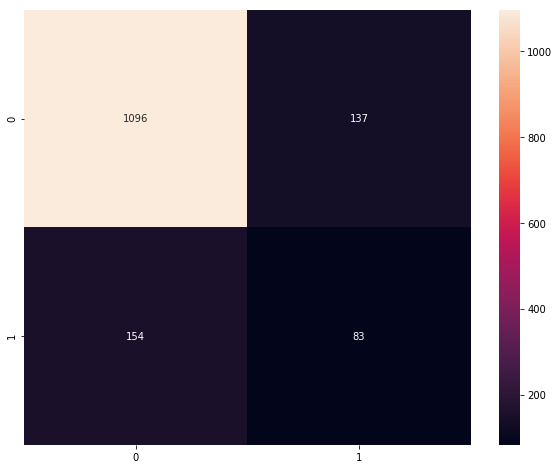

In [29]:
model = Sequential()

# layers
model.add(Dense(units = 50, activation = 'relu', input_dim = 32))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_confusion_matrix = []
avg_feature_importance = []

kf = KFold(n_splits=5)
fold_count = 0

for intI in range(0,5):
    traindataSub = traindataList[intI]
    testdataSub = testdataList[intI]
        
    train_X , train_y =  PreprocessDataFS(traindataSub,1)
    test_X , test_y =  PreprocessDataFS(testdataSub,0)
        
    # Train the ANN
    model.fit(train_X, train_y, batch_size = 16, epochs = 200)
    y_pred = model.predict(test_X)
    test_predict = (y_pred > 0.5).astype(int).reshape(test_X.shape[0])
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
        
        

    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1
      
  
print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                               round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))
    
    

plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()
